# Week

In [17]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


## Import and clean data

In [18]:
def wrangle(filepath):
    #read data
    df= pd.read_csv(filepath)
    # drop empty rows
    df.dropna(inplace=True)
    return df

In [19]:
df= wrangle("Diabetes.csv")
df.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [20]:
#check the shape and data info
df.shape

(768, 9)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pregnancies  768 non-null    int64  
 1   glucose      768 non-null    int64  
 2   diastolic    768 non-null    int64  
 3   triceps      768 non-null    int64  
 4   insulin      768 non-null    int64  
 5   bmi          768 non-null    float64
 6   dpf          768 non-null    float64
 7   age          768 non-null    int64  
 8   diabetes     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# Explore 

Let's explore the descriptive  of the categories of women according to age 

In [22]:
age_counts = df["age"].value_counts(ascending=False).head(10)
age_counts

age
22    72
21    63
25    48
24    46
23    38
28    35
26    33
27    32
29    29
31    24
Name: count, dtype: int64

The illustrate this in a bar chart

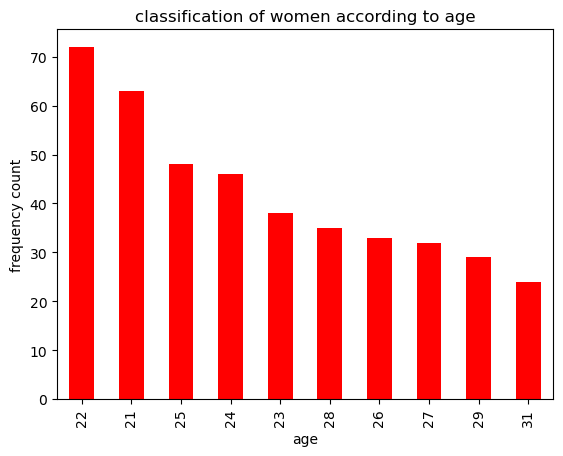

In [23]:
#plot bar chart
age_counts.plot(kind="bar", color="red")
#put the title
plt.title("classification of women according to age")

# label x axis
plt.ylabel("frequency count");


The age of most women are between 22years and 31 years. 72 women falls between 22 years, 63 women are are 21 years old while 24 women are 31 years. This indicates that most women in the data are majorly young ladies.

let look at the insuline distribution of the patients

''

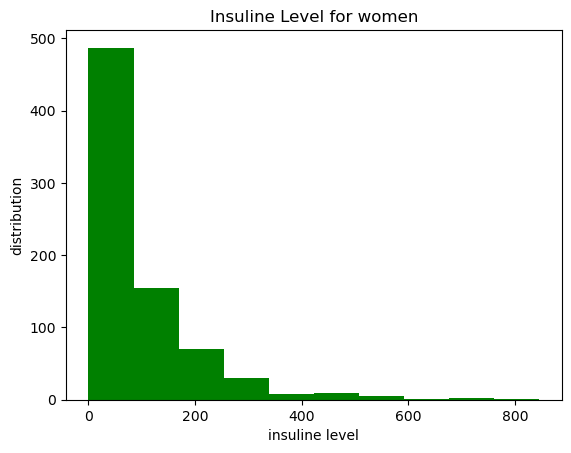

In [24]:
#plot histogram
plt.hist(df["insulin"], bins= 10, color="green")
# insert the title
plt.title("Insuline Level for women")
# label your x-axis
plt.xlabel("insuline level")

#label your y-axis
plt.ylabel("distribution")
;

You discover that most patient's insulin level fall within 0 and 200

let's explore the the glucose distributiuon among women

''

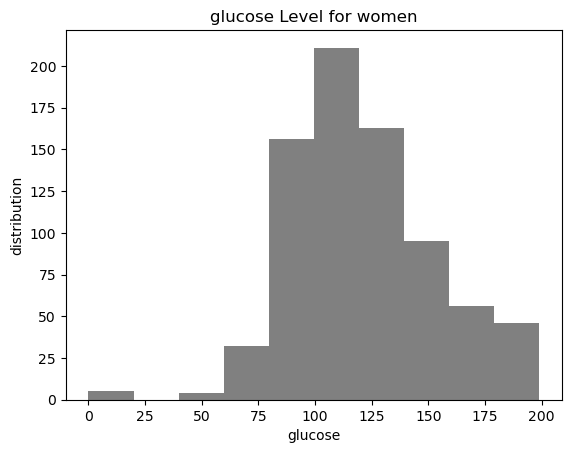

In [25]:
#plot histogram
plt.hist(df["glucose"], bins= 10, color="grey")
# insert the title
plt.title("glucose Level for women")
# label your x-axis
plt.xlabel("glucose")

#label your y-axis
plt.ylabel("distribution")
;

The glucose level fall between 75 and 200

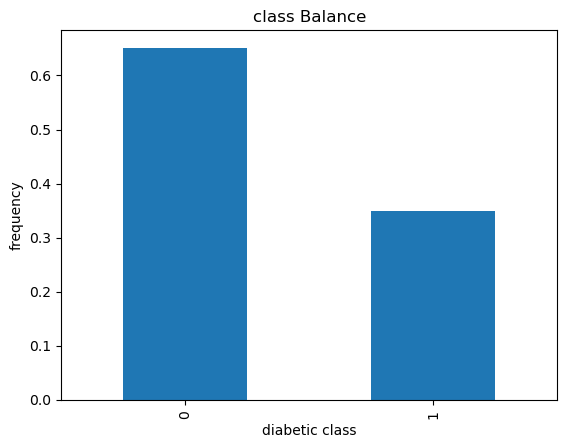

In [26]:
#plot value counts for diabetic
df["diabetes"].value_counts(normalize=True).plot(kind="bar")
plt.title("class Balance")
plt.xlabel("diabetic class")
plt.ylabel("frequency");

This is an indication that there are higher number of non diabetic patient compared to diabetic patient. let check the minority and majority class of our patients

In [27]:
majority_class, minority_class = (df["diabetes"].value_counts(normalize=True)).round(2)
print(majority_class, minority_class)

0.65 0.35


You can see that the class that contains non diabetic patients have the majority of patient compared to the minority class. this is an indication from the data most patient do not have diabeties.

## Split

In [28]:
target = "diabetes"
X = df.drop(columns=target)
y = df[target] 

In [29]:
X_train, X_test, y_train, y_test = train_test_split(
    X,y, test_size=0.2, random_state=42
)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (614, 8)
y_train shape: (614,)
X_test shape: (154, 8)
y_test shape: (154,)


## Baseline

In [30]:
#find the baseline of the training data
acc_baseline = y_train.value_counts(normalize= True).max()
print("Baseline Accuracy:", round(acc_baseline, 2))


Baseline Accuracy: 0.65


the

In [32]:
# let instantiate our model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [16]:
# calculate y_pred_baseline
y_pred_baseline = model.predict(X_train)
y_pred_baseline[:5]

array([37.53307192, 30.30987539, 41.54595888, 29.37327876, 33.77830798])

In [33]:
acc_train = accuracy_score(y_train, model.predict(X_train))
acc_test = model.score(X_test, y_test)

print("Training Accuracy:", round(acc_train, 2))
print("Test Accuracy:", round(acc_test, 2))

Training Accuracy: 0.77
Test Accuracy: 0.75


Since we have a training accuracy and test accurace closer to each other, this is an indication that our model trained very well . to generalise this we need to probability of prediction

In [34]:
y_train_pred_proba = model.predict_proba(X_train)
print(y_train_pred_proba[:5])

[[0.99359568 0.00640432]
 [0.52899875 0.47100125]
 [0.68090953 0.31909047]
 [0.35293446 0.64706554]
 [0.29146404 0.70853596]]


## communicate model
we will have to find the coefficient and intercept of our model.

In [35]:
# calculate the coefficient
coefficient = (model.coef_).round(2)
print(coefficient)

[[ 0.06  0.03 -0.01  0.   -0.    0.1   0.63  0.04]]


In [38]:
# calculate the intercept
intercept = (model.intercept_).round(2)
print("the model intercept:",intercept)

the model intercept: [-9.01]
